In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
#Upload dataset
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
# Load the dataset
file_path = 'cardio_train.csv'
df = pd.read_csv(file_path, sep=';')
print("Data loaded successfully!")

Data loaded successfully!


In [ ]:
# Basic information about the dataset
print("--- Dataset Info ---")
df.info()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Display first few rows
print("--- First 5 rows ---")
df.head()

--- First 5 rows ---


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Age is in days, convert to years first
df['age_years'] =(df['age'] / 365).round().astype('int')

# Create BMI feature
df['BMI'] = df['weight'] / ((df['height']/100)**2)

# Drop ID, age in days column
df = df.drop(columns=['id', 'age'])

In [ ]:
# Summary statistics
print("--- Summary Statistics ---")
df.describe()

--- Summary Statistics ---


,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686,27.556513
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294,6.091511
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.374068
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.222222
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,298.666667


In [ ]:
# Check for missing values
print("--- Missing Values ---")
df.isnull().sum()

--- Missing Values ---


,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0
active,0


In [ ]:
df.duplicated().sum()

np.int64(3816)

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Check class distribution (target variable 'cardio')
print("-- Target Variable Distribution ---")
df['cardio'].value_counts(normalize=True) * 100

-- Target Variable Distribution ---


,proportion
cardio,
1,51.361356
0,48.638644


In [ ]:
# Data types check
print("--- Data Types ---")
df.dtypes

--- Data Types ---


,0
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64
alco,int64
active,int64


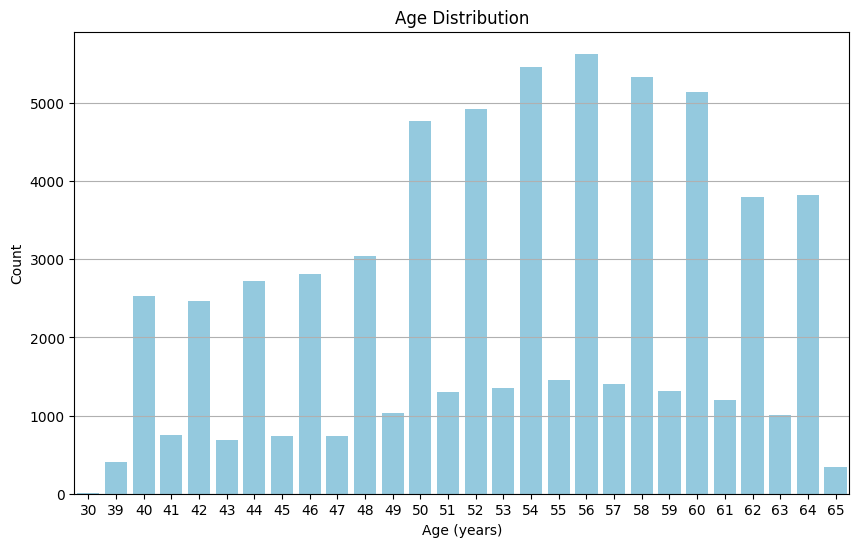

In [ ]:
#Age Distribution
plt.figure(figsize=(10,6))
sns.countplot(x='age_years', data=df, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

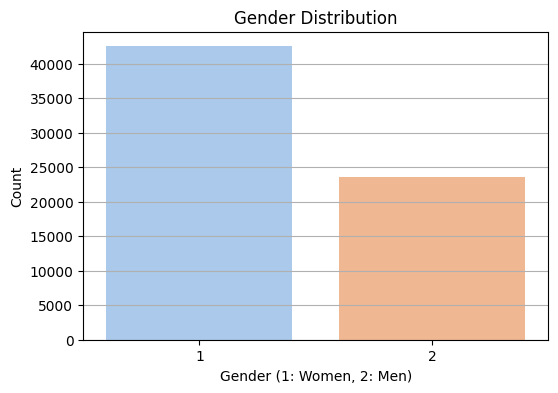

In [ ]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender (1: Women, 2: Men)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

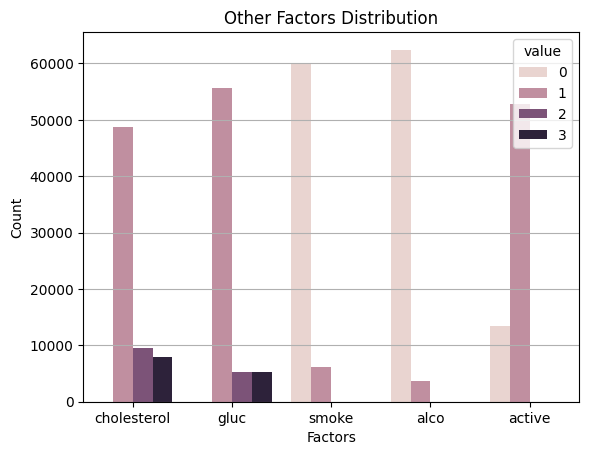

In [ ]:
# Other factors distribution
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));
plt.title('Other Factors Distribution')
plt.xlabel('Factors')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

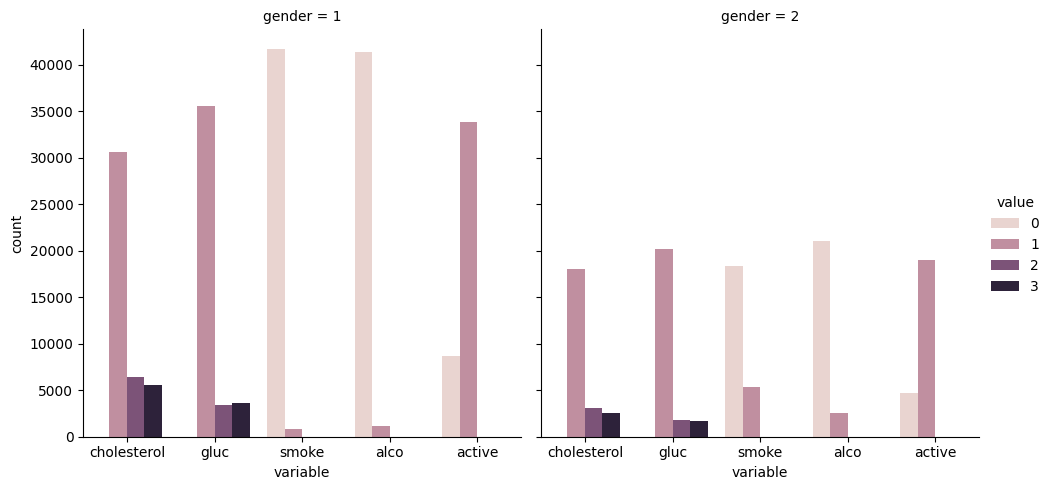

In [ ]:
# Grouped barplot - Gender vs Other factors
df_long = pd.melt(df, id_vars=['gender'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="gender", data=df_long, kind="count");
plt.ylabel('Count')
plt.show()

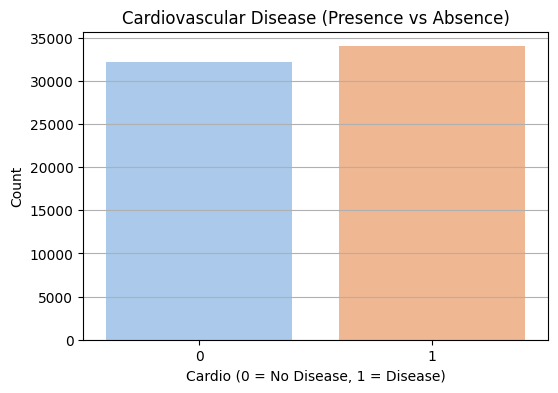

In [ ]:
# Cardiovascular disease presence distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cardio', palette='pastel')
plt.title('Cardiovascular Disease (Presence vs Absence)')
plt.xlabel('Cardio (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

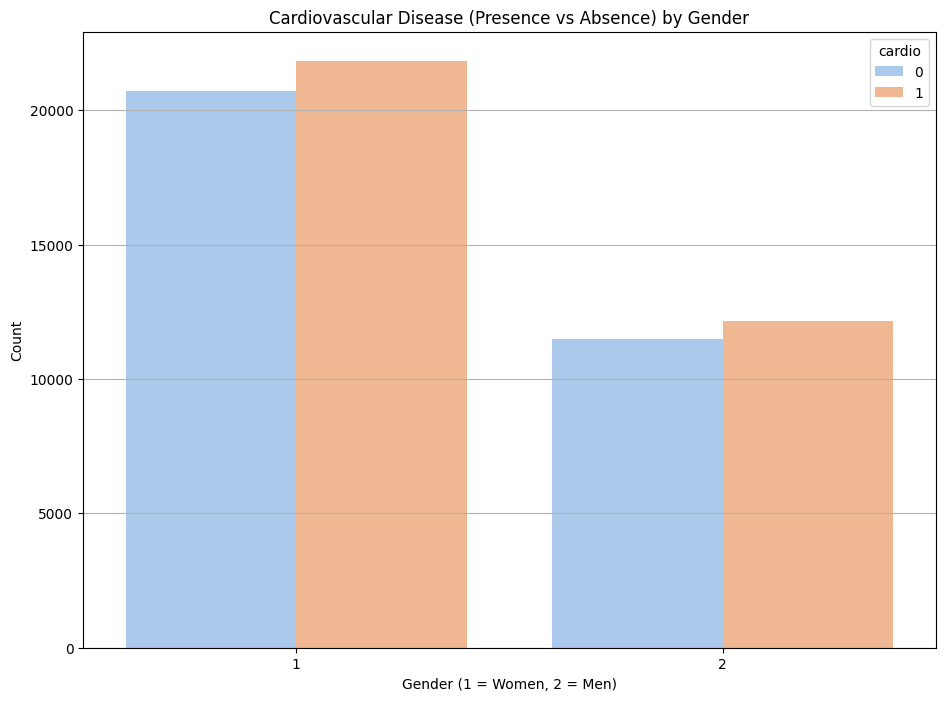

In [ ]:
# Grouped barplot - Cardio vs Gender
plt.rcParams['figure.figsize'] = 11, 8
sns.countplot(x='gender', hue='cardio', data = df, palette='pastel');
plt.xlabel('Gender (1 = Women, 2 = Men)')
plt.ylabel('Count')
plt.title('Cardiovascular Disease (Presence vs Absence) by Gender')
plt.grid(axis='y')
plt.show()

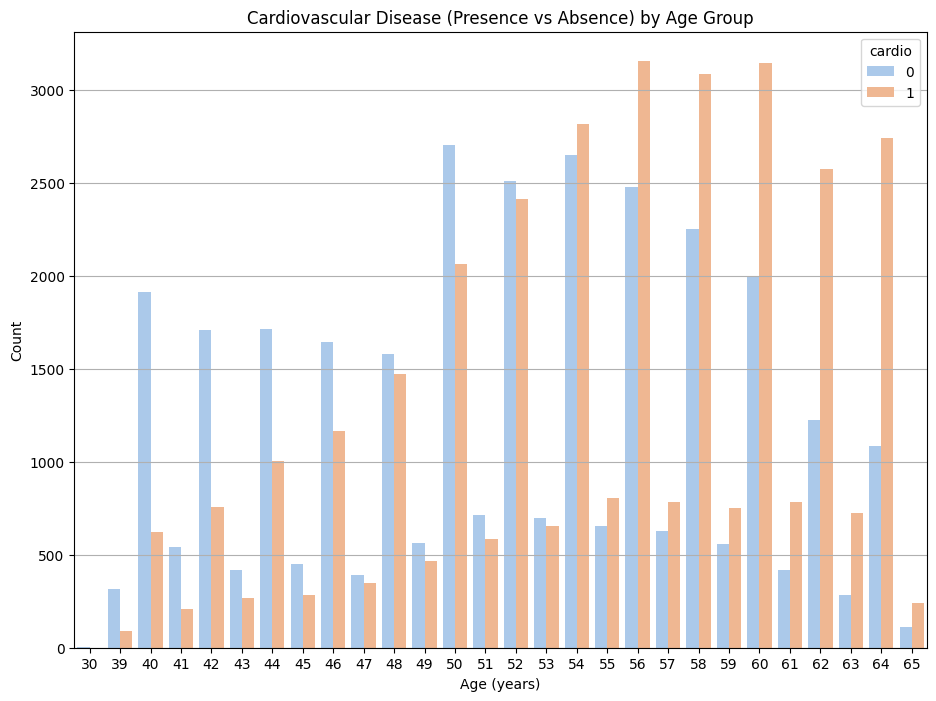

In [ ]:
# Grouped barplot - Cardio vs Age Groups
plt.rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age_years', hue='cardio', data = df, palette='pastel');
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Cardiovascular Disease (Presence vs Absence) by Age Group')
plt.grid(axis='y')
plt.show()

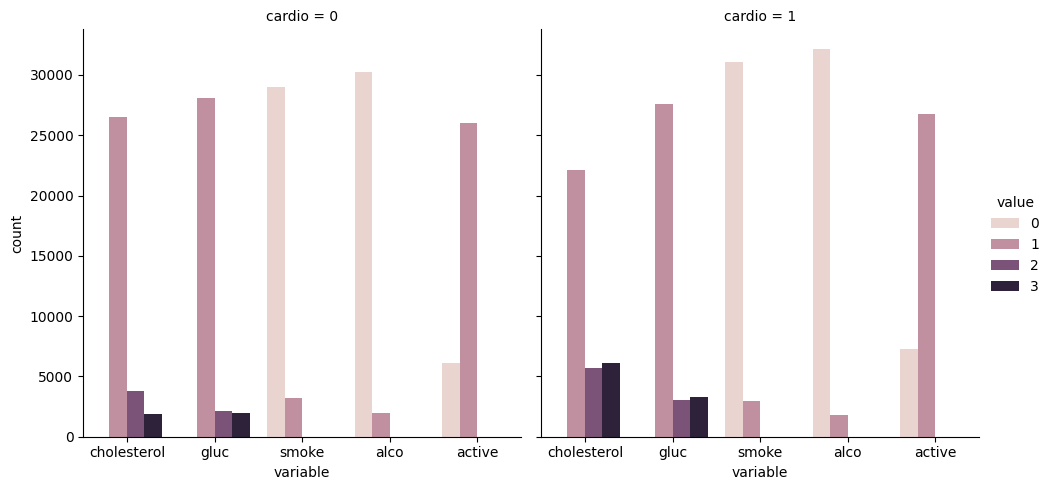

In [ ]:
# Grouped barplot - Cardio vs Other factors
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count");
plt.ylabel('Count')
plt.show()

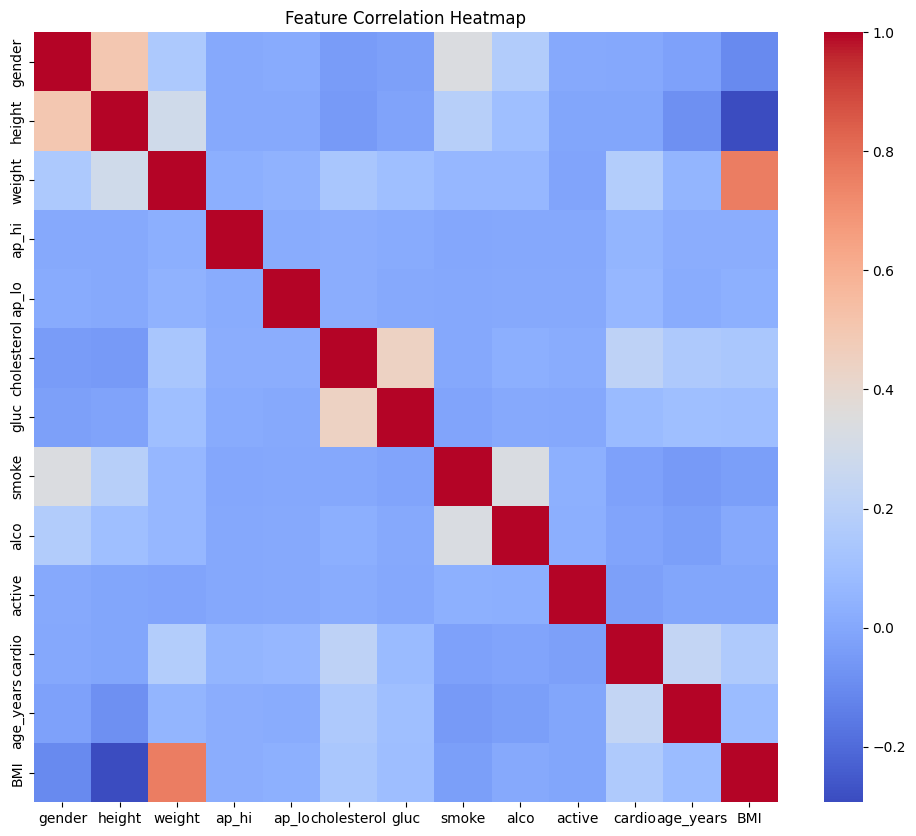

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

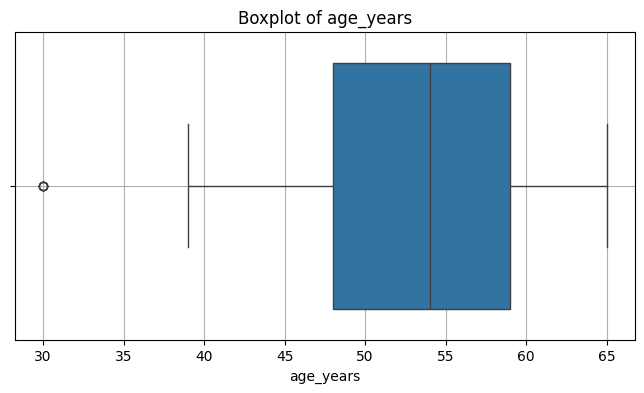

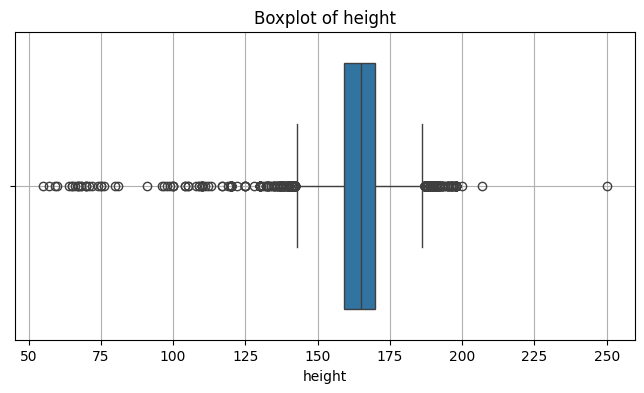

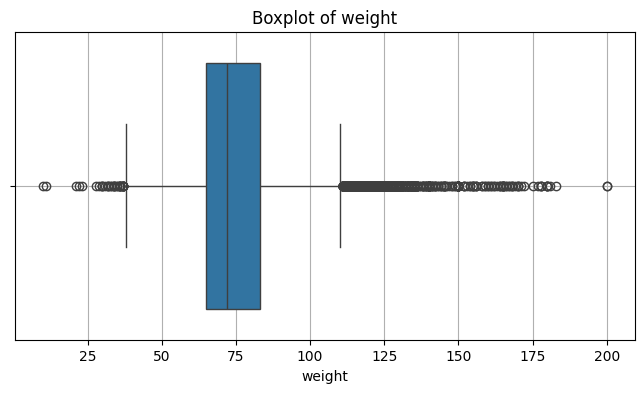

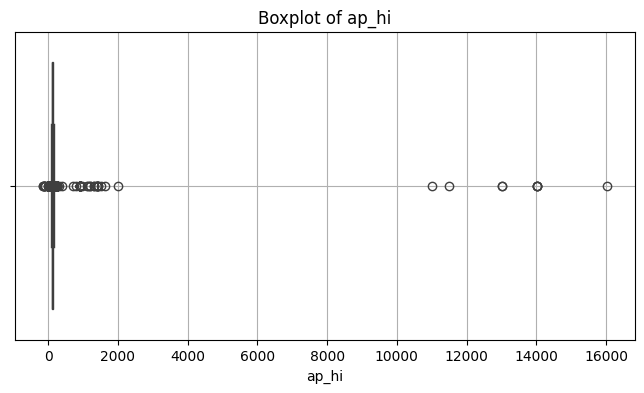

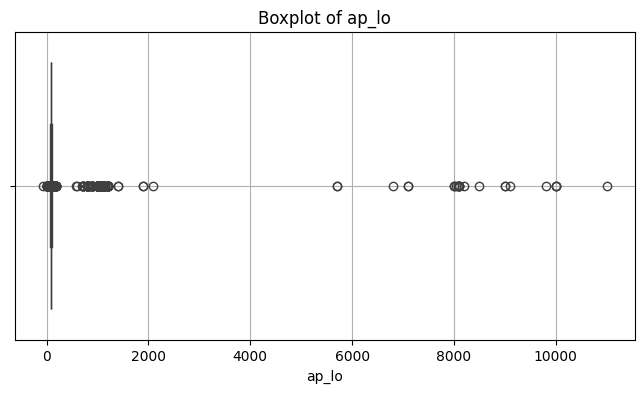

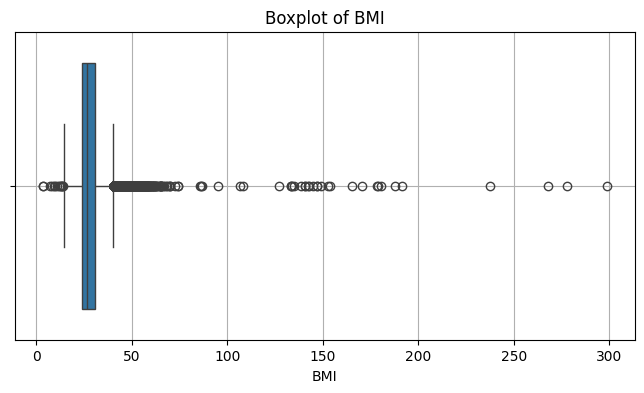

=== Number of Outliers per Feature (|z| > 3) ===
age_years      4
height       257
weight       649
ap_hi         38
ap_lo        951
BMI          489
dtype: int64


In [ ]:
from scipy.stats import zscore

# Focus variables for outlier handling
cols_to_check = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']

# Boxplots for visual inspection
for col in cols_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.grid()
    plt.show()

# Z-score method to detect outliers (absolute z-score > 3)
z_scores = df[cols_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3).sum()

print("=== Number of Outliers per Feature (|z| > 3) ===")
print(outliers)

In [ ]:
# Remove implausible BP values
df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 150)]
df = df[df['ap_hi'] > df['ap_lo']]

# Replace extreme height values
height_median = df['height'].median()
df['height'] = np.where((df['height'] < 130) | (df['height'] > 210), height_median, df['height'])

# Replace extreme weight values
weight_median = df['weight'].median()
df['weight'] = np.where((df['weight'] < 40) | (df['weight'] > 180), weight_median, df['weight'])

# Recalculate BMI feature
df['BMI'] = df['weight'] / ((df['height']/100)**2)

In [ ]:
age_median = df['age_years'].median()
bmi_median = df['BMI'].median()
print(f"Median Age: {age_median}")
print(f"Median BMI: {bmi_median}")

Median Age: 54.0
Median BMI: 26.573129251700685


In [ ]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
count,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000,64762.000000
mean,1.356552,164.434375,74.531427,127.090995,81.431704,1.384145,1.237670,0.092662,0.056345,0.797211,0.508987,53.356660,27.602146
std,0.478984,7.972056,14.481516,16.964154,9.596534,0.691303,0.583797,0.289961,0.230588,0.402079,0.499923,6.809736,5.286352
min,1.000000,130.000000,40.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,13.520822
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875433
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,54.000000,26.573129
75%,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000,30.457656
max,2.000000,207.000000,180.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,85.779743


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Define features (X) and target (y), cardio is the target
X = df.drop('cardio', axis=1)
y = df['cardio']

In [ ]:
# Standardize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Convert scaled features back to a DataFrame for better interpretability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print("--- Preprocessing Done ---")
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

--- Preprocessing Done ---
Training Set Shape: (51809, 12)
Testing Set Shape: (12953, 12)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "MLP Neural Network": MLPClassifier( max_iter=500, random_state=42)
}

# Define metrics to evaluate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

In [ ]:
# Cross-validation loop
from sklearn.model_selection import cross_validate

results = {}

print("----- Cross-Validation Results (5-Fold) -----\n")
for name, model in models.items():
    cv_result = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    results[name] = {
        'Accuracy': np.mean(cv_result['test_Accuracy']),
        'Precision': np.mean(cv_result['test_Precision']),
        'Recall': np.mean(cv_result['test_Recall']),
        'F1': np.mean(cv_result['test_F1'])
    }

    # Print metrics
    print(f"{name}")
    print("-" * len(name))
    for metric, value in results[name].items():
        print(f"{metric}: {value:.4f}")
    print('\n')

----- Cross-Validation Results (5-Fold) -----

Logistic Regression
-------------------
Accuracy: 0.7247
Precision: 0.7491
Recall: 0.6904
F1: 0.7185


Random Forest
-------------
Accuracy: 0.6990
Precision: 0.7069
Recall: 0.6981
F1: 0.7025


XGBoost
-------
Accuracy: 0.7263
Precision: 0.7479
Recall: 0.6974
F1: 0.7218


MLP Neural Network
------------------
Accuracy: 0.7298
Precision: 0.7374
Recall: 0.7289
F1: 0.7331




In [ ]:
# Model training and prediction on test set

from sklearn.metrics import classification_report, confusion_matrix

# Store trained models and their predictions
trained_models = {}
predictions = {}

print("----- Final Model Training and Evaluation on Test Set -----\n")

for name, model in models.items():
    # Train the model on full training data
    model.fit(X_train, y_train)

    # Store trained model
    trained_models[name] = model

    # Predict on test data
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Evaluate performance
    print(f"{name}")
    print("-" * len(name))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("\n")

----- Final Model Training and Evaluation on Test Set -----

Logistic Regression
-------------------
Confusion Matrix:
[[4852 1508]
 [2085 4508]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6994    0.7629    0.7298      6360
           1     0.7493    0.6838    0.7150      6593

    accuracy                         0.7226     12953
   macro avg     0.7244    0.7233    0.7224     12953
weighted avg     0.7248    0.7226    0.7223     12953



Random Forest
-------------
Confusion Matrix:
[[4385 1975]
 [2111 4482]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6750    0.6895    0.6822      6360
           1     0.6941    0.6798    0.6869      6593

    accuracy                         0.6846     12953
   macro avg     0.6846    0.6846    0.6845     12953
weighted avg     0.6848    0.6846    0.6846     12953



XGBoost
-------
Confusion Matrix:
[[4818 1542]
 [2033 4560]]

Classificatio

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' only works with solver='liblinear'
    'solver': ['lbfgs']
}
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='f1', n_jobs=-1)
logreg_grid.fit(X_train, y_train)
print("Best Logistic Regression:", logreg_grid.best_params_)

In [ ]:
# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest:", rf_grid.best_params_)

In [ ]:
# XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1]
}
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost:", xgb_grid.best_params_)

In [ ]:
# MLP Neural Network
mlp_params = {
    'hidden_layer_sizes': [(64,), (64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}
mlp = MLPClassifier(max_iter=500, random_state=42)
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, scoring='f1', n_jobs=-1, verbose=4)
mlp_grid.fit(X_train, y_train)
print("Best MLP:", mlp_grid.best_params_)

In [ ]:
# Define best models with your tuned hyperparameters
best_logreg = LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
best_rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, max_features='sqrt', random_state=42)
best_xgb = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, eval_metric='logloss', use_label_encoder=False, random_state=42)
best_mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', alpha=0.0001, learning_rate_init=0.01, max_iter=500, random_state=42)

# Dictionary for streamlined training and evaluation
final_models = {
    "Logistic Regression (Tuned)": best_logreg,
    "Random Forest (Tuned)": best_rf,
    "XGBoost (Tuned)": best_xgb,
    "MLP Neural Network (Tuned)": best_mlp
}

# Evaluate each model on test set
final_predictions = {}

print("----- Final Retraining with Tuned Parameters on Test Set -----\n")

for name, model in final_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    final_predictions[name] = y_pred

    print(f"{name}")
    print("-" * len(name))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("\n")

----- Final Retraining with Tuned Parameters on Test Set -----

Logistic Regression (Tuned)
---------------------------
Confusion Matrix:
[[4854 1506]
 [2090 4503]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6990    0.7632    0.7297      6360
           1     0.7494    0.6830    0.7146      6593

    accuracy                         0.7224     12953
   macro avg     0.7242    0.7231    0.7222     12953
weighted avg     0.7247    0.7224    0.7220     12953



Random Forest (Tuned)
---------------------
Confusion Matrix:
[[4993 1367]
 [2180 4413]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6961    0.7851    0.7379      6360
           1     0.7635    0.6693    0.7133      6593

    accuracy                         0.7262     12953
   macro avg     0.7298    0.7272    0.7256     12953
weighted avg     0.7304    0.7262    0.7254     12953



XGBoost (Tuned)
---------------
Confusio

In [ ]:
# Calculate feature importance
from sklearn.inspection import permutation_importance

models = {
    "Logistic Regression": best_logreg,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "MLP Neural Network": best_mlp
}

# Feature names
feature_names = X_train.columns

# Initialize result dictionary
feature_importances = {}

# Logistic Regression — Coefficients
coef = np.abs(models["Logistic Regression"].coef_[0])
feature_importances["Logistic Regression"] = pd.Series(coef, index=feature_names)

# Random Forest — Built-in feature importances
rf_importance = models["Random Forest"].feature_importances_
feature_importances["Random Forest"] = pd.Series(rf_importance, index=feature_names)

# XGBoost — Built-in feature mportances
xgb_importance = models["XGBoost"].feature_importances_
feature_importances["XGBoost"] = pd.Series(xgb_importance, index=feature_names)

# MLP — Use permutation importance
perm = permutation_importance(models["MLP Neural Network"], X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
feature_importances["MLP Neural Network"] = pd.Series(perm.importances_mean, index=feature_names)


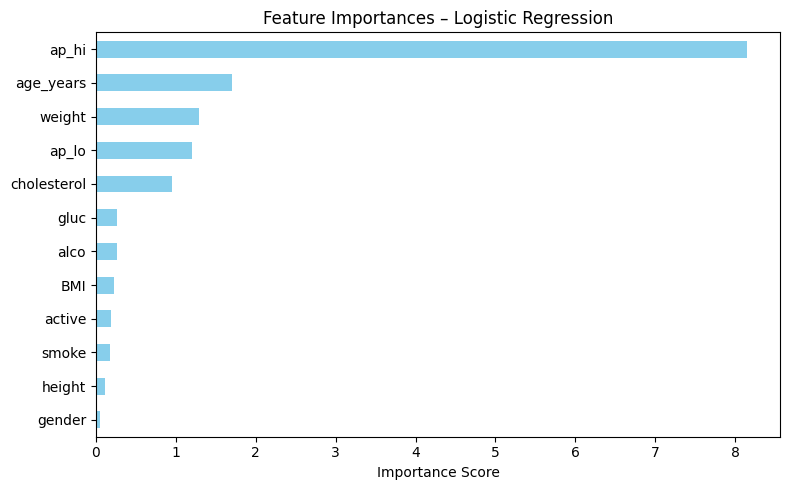

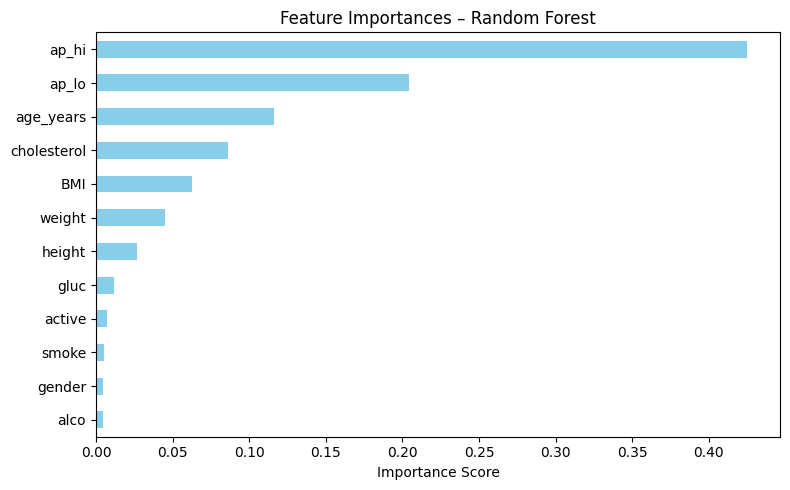

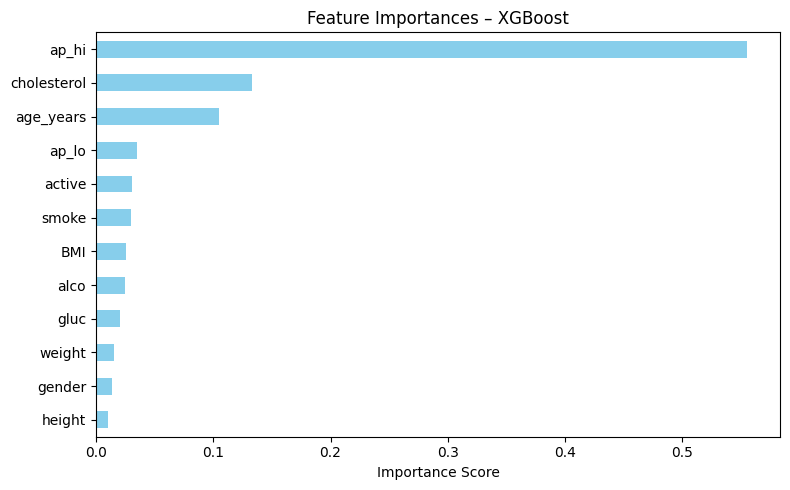

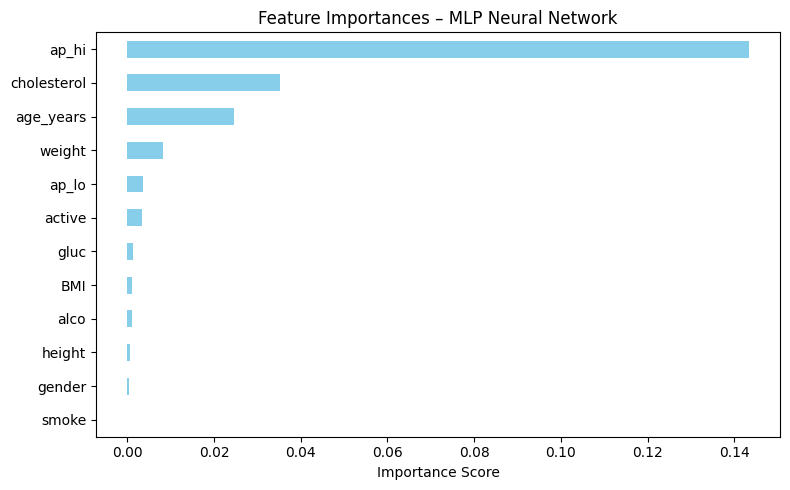

In [ ]:
# Plot feature importances for each model
for model_name, importances in feature_importances.items():
    sorted_imp = importances.sort_values(ascending=False).head(12)

    plt.figure(figsize=(8, 5))
    sorted_imp.plot(kind='barh', color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f'Feature Importances – {model_name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()


In [ ]:
# Top-N feature values
top_n_list = [4, 6, 8, 10]

In [ ]:
# Feature selection and comparision of performances (Logistic Regression)
# Get absolute coefficients as feature importance
logreg_importance = np.abs(best_logreg.coef_[0])
logreg_importance = pd.Series(logreg_importance, index=X_train.columns).sort_values(ascending=False)

# Store results
logreg_results = []

In [ ]:
logreg_importance

,0
ap_hi,8.152832
age_years,1.703802
weight,1.292055
ap_lo,1.204123
cholesterol,0.952332
gluc,0.266101
alco,0.258640
BMI,0.226188
active,0.191235
smoke,0.174060


In [ ]:
for N in top_n_list:
    selected_feats = logreg_importance.head(N).index.tolist()
    X_train_sub = X_train[selected_feats]
    X_test_sub = X_test[selected_feats]

    # Retrain logistic regression model
    model = LogisticRegression(C=10, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)

    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    logreg_results.append({
        'Top_N_Features': N,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4),
    })

In [ ]:
# Display as table
logreg_results_df = pd.DataFrame(logreg_results)
print("=== Logistic Regression Evaluation by Top N Features ===")
logreg_results_df

=== Logistic Regression Evaluation by Top N Features ===


,Top_N_Features,Accuracy,Precision,Recall,F1-Score
0,4,0.7156,0.7172,0.7156,0.7154
1,6,0.7215,0.7240,0.7215,0.7211
2,8,0.7227,0.7251,0.7227,0.7223
3,10,0.7217,0.7240,0.7217,0.7213


In [ ]:
# Feature selection and comparision of performances (Random Forest)
# Get built-in feature importances from trained model
rf_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
rf_importance = rf_importance.sort_values(ascending=False)

# Store results
rf_results = []

In [ ]:
rf_importance

,0
ap_hi,0.425221
ap_lo,0.204472
age_years,0.115966
cholesterol,0.086273
BMI,0.062657
weight,0.044907
height,0.026901
gluc,0.011958
active,0.007086
smoke,0.005473


In [ ]:
for N in top_n_list:
    selected_feats = rf_importance.head(N).index.tolist()
    X_train_sub = X_train[selected_feats]
    X_test_sub = X_test[selected_feats]

    # Retrain Random Forest
    model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, max_features='sqrt', random_state=42)

    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    rf_results.append({
        'Top_N_Features': N,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4),
    })

In [ ]:
# Display as table
rf_results_df = pd.DataFrame(rf_results)
print("=== Random Forest Evaluation by Top N Features ===")
rf_results_df

=== Random Forest Evaluation by Top N Features ===


,Top_N_Features,Accuracy,Precision,Recall,F1-Score
0,4,0.7269,0.7295,0.7269,0.7265
1,6,0.7299,0.7329,0.7299,0.7294
2,8,0.7283,0.7326,0.7283,0.7276
3,10,0.7300,0.7331,0.7300,0.7295


In [ ]:
# Get XGBoost's feature importance
xgb_importance = feature_importances["XGBoost"].sort_values(ascending=False)

# Store results
xgb_results = []

In [ ]:
xgb_importance

,0
ap_hi,0.555447
cholesterol,0.133283
age_years,0.104738
ap_lo,0.034590
active,0.030992
smoke,0.030092
BMI,0.025307
alco,0.025113
gluc,0.020899
weight,0.015750


In [ ]:
for N in top_n_list:
    selected_feats = xgb_importance.head(N).index.tolist()
    X_train_sub = X_train[selected_feats]
    X_test_sub = X_test[selected_feats]

    # Retrain XGBoost
    model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, eval_metric='logloss', use_label_encoder=False, random_state=42)

    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    xgb_results.append({
        'Top_N_Features': N,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4),
    })

In [ ]:
# Display as table
xgb_results_df = pd.DataFrame(xgb_results)
print("=== XGBoost Evaluation by Top N Features ===")
xgb_results_df

=== XGBoost Evaluation by Top N Features ===


,Top_N_Features,Accuracy,Precision,Recall,F1-Score
0,4,0.7283,0.7299,0.7283,0.7281
1,6,0.7311,0.7324,0.7311,0.7310
2,8,0.7331,0.7345,0.7331,0.7330
3,10,0.7331,0.7344,0.7331,0.7330


In [ ]:
# Get MLP feature importance
mlp_importance = pd.Series(perm.importances_mean, index=X_train.columns)
mlp_importance = mlp_importance.sort_values(ascending=False)

# Store results
mlp_results = []

In [ ]:
mlp_importance

,0
ap_hi,0.143372
cholesterol,0.035212
age_years,0.024512
weight,0.008214
ap_lo,0.003659
active,0.003412
gluc,0.001359
BMI,0.001158
alco,0.001096
height,0.000718


In [ ]:
for N in top_n_list:
    selected_feats = mlp_importance.head(N).index.tolist()
    X_train_sub = X_train[selected_feats]
    X_test_sub = X_test[selected_feats]

    # Retrain MLP with tuned hyperparameters
    model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', alpha=0.0001, learning_rate_init=0.01, max_iter=500, random_state=42)

    model.fit(X_train_sub, y_train)
    y_pred = model.predict(X_test_sub)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mlp_results.append({
        'Top_N_Features': N,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-Score': round(f1, 4),
    })

In [ ]:
# Display as table
mlp_results_df = pd.DataFrame(mlp_results)
print("=== MLP Neural Network Evaluation by Top N Features ===")
mlp_results_df

=== MLP Neural Network Evaluation by Top N Features ===


,Top_N_Features,Accuracy,Precision,Recall,F1-Score
0,4,0.7258,0.7268,0.7258,0.7257
1,6,0.7272,0.7283,0.7272,0.7272
2,8,0.7301,0.7305,0.7301,0.7301
3,10,0.7286,0.7291,0.7286,0.7286


In [ ]:
# Compute fairness metrics function
def get_fairness_metrics(df, protected_attr, unpriv_val, priv_val):
    unpriv = df[df[protected_attr] == unpriv_val]
    priv = df[df[protected_attr] == priv_val]

    # Positive prediction rates
    pr_unpriv = unpriv['y_pred'].mean()
    pr_priv = priv['y_pred'].mean()
    SPD = pr_unpriv - pr_priv
    DI = pr_unpriv / pr_priv if pr_priv != 0 else np.nan

    # Confusion matrices
    cm_unpriv = confusion_matrix(unpriv['y_true'], unpriv['y_pred'], labels=[0, 1])
    cm_priv = confusion_matrix(priv['y_true'], priv['y_pred'], labels=[0, 1])

    TPR_unpriv = cm_unpriv[1, 1] / (cm_unpriv[1, 1] + cm_unpriv[1, 0]) if (cm_unpriv[1, 1] + cm_unpriv[1, 0]) > 0 else 0
    TPR_priv = cm_priv[1, 1] / (cm_priv[1, 1] + cm_priv[1, 0]) if (cm_priv[1, 1] + cm_priv[1, 0]) > 0 else 0
    EOD = TPR_unpriv - TPR_priv

    FPR_unpriv = cm_unpriv[0, 1] / (cm_unpriv[0, 1] + cm_unpriv[0, 0]) if (cm_unpriv[0, 1] + cm_unpriv[0, 0]) > 0 else 0
    FPR_priv = cm_priv[0, 1] / (cm_priv[0, 1] + cm_priv[0, 0]) if (cm_priv[0, 1] + cm_priv[0, 0]) > 0 else 0
    AOD = 0.5 * ((TPR_unpriv - TPR_priv) + (FPR_unpriv - FPR_priv))

    return {
        'SPD': round(SPD, 4),
        'DI': round(DI, 4),
        'EOD': round(EOD, 4),
        'AOD': round(AOD, 4)
    }

In [ ]:
# Compute fairness metrics for each model
bias_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Prepare evaluation dataframe
    df_eval = X_test.copy()
    df_eval['y_true'] = y_test.values
    df_eval['y_pred'] = y_pred
    df_eval['gender'] = df.loc[y_test.index, 'gender']
    df_eval['age_years'] = df.loc[y_test.index, 'age_years']
    df_eval['age_binary_group'] = np.where(df_eval['age_years'] < 50, 'under_50', '50_and_over')

    # Gender fairness
    gender_metrics = get_fairness_metrics(df_eval, 'gender', 1, 2)
    gender_metrics.update({'Model': name, 'Group': 'Gender'})
    bias_results.append(gender_metrics)

    # Age group fairness
    age_metrics = get_fairness_metrics(df_eval, 'age_binary_group', 'under_50', '50_and_over')
    age_metrics.update({'Model': name, 'Group': 'Age'})
    bias_results.append(age_metrics)

In [ ]:
# Create summary DataFrame
bias_df = pd.DataFrame(bias_results)[['Model', 'Group', 'SPD', 'DI', 'EOD', 'AOD']]
print("=== Fairness Metrics Across All Models ===")
bias_df

=== Fairness Metrics Across All Models ===


,Model,Group,SPD,DI,EOD,AOD
0,Logistic Regression,Gender,0.0056,1.0122,-0.0414,0.0089
1,Logistic Regression,Age,-0.0075,0.9839,0.0077,-0.0152
2,Random Forest,Gender,0.0097,1.0222,-0.0085,0.0130
3,Random Forest,Age,-0.0019,0.9958,0.0065,-0.0094
4,XGBoost,Gender,0.0054,1.0115,-0.0169,0.0088
5,XGBoost,Age,0.0115,1.0243,0.0322,0.0033
6,MLP Neural Network,Gender,0.0073,1.0147,-0.0221,0.0107
7,MLP Neural Network,Age,0.0140,1.0281,0.0319,0.0060


In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
# Use TreeExplainer for XGBoost (Overall the best model)
explainer = shap.Explainer(best_xgb, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

 99%|===================| 12877/12953 [00:38<00:00]       

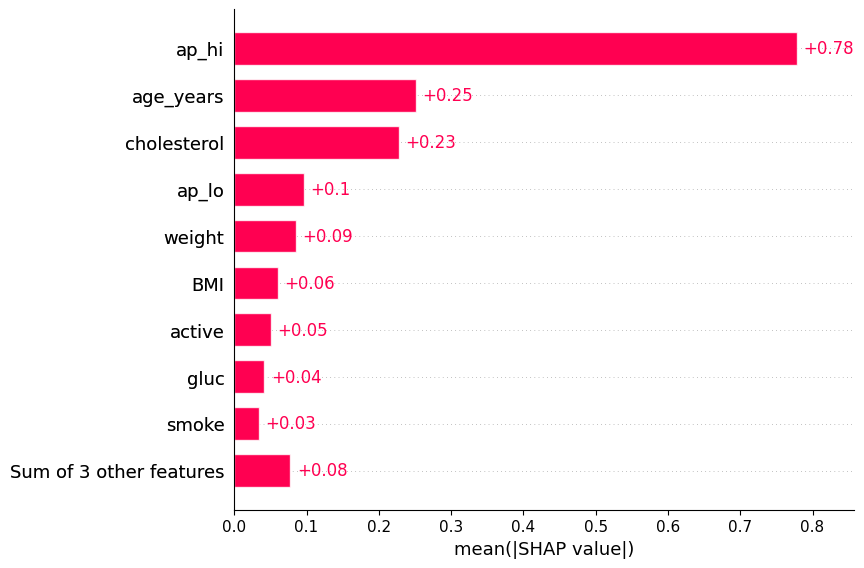

In [ ]:
# Summary plot (bar = mean absolute SHAP values)
shap.plots.bar(shap_values, max_display=10)

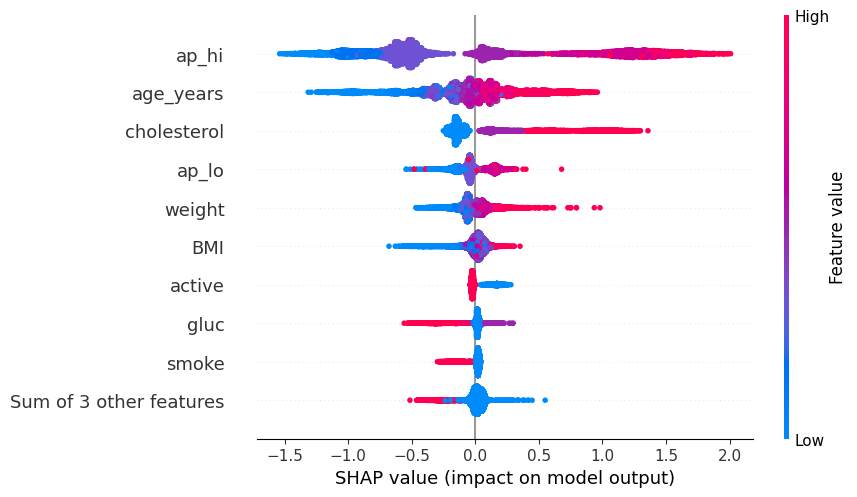

In [ ]:
# Alternatively: beeswarm plot (impact + direction)
shap.plots.beeswarm(shap_values, max_display=10)

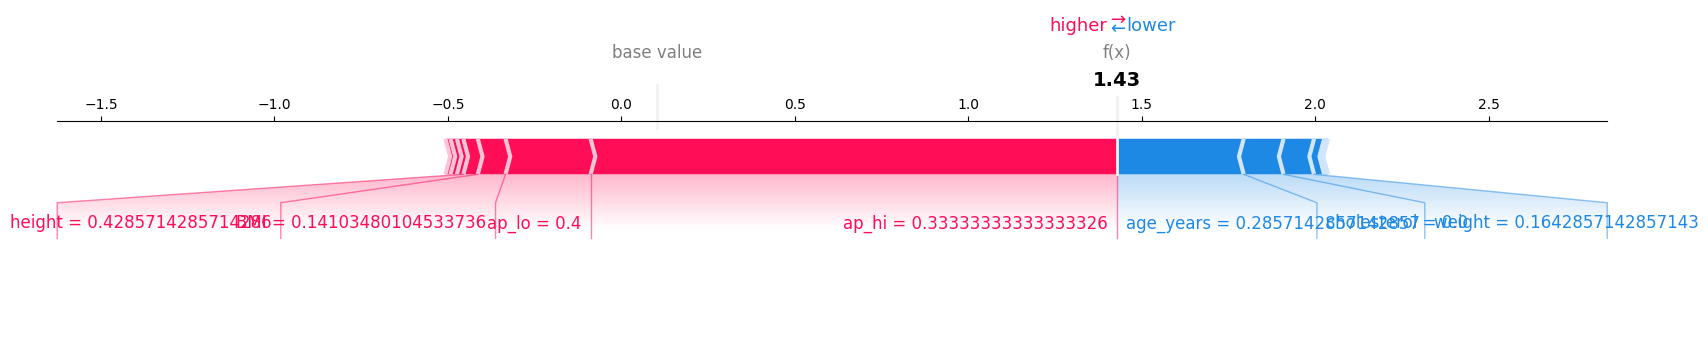

In [ ]:
# Choose a specific instance
i = 0  # First test sample
shap.plots.force(shap_values[i], matplotlib=True)